# CAPSTONE PROJECT :- PRCP-1020-HousePricePred


# PROJECT TEAM ID :- PTID-CDS-OCT-23-1659



# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the sales team to know the price of the house.

Task3:-Suggestions to the sales team predicted price of house.'''


# AIM:
To predict the final sale price of each home with 79 explanatory variables describing (almost) every aspect of residential home.

In [352]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visulazing librarires
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import preprocessing packages
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

# Import models
from sklearn.linear_model import LassoCV, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR

#Display the image 
from IPython.display import Image

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Round the number to two decimal places and display it.
pd.set_option('display.float_format', lambda x: '{:0.2f}'.format(x))

print('Done! All packges loaded.')



Done! All packges loaded.


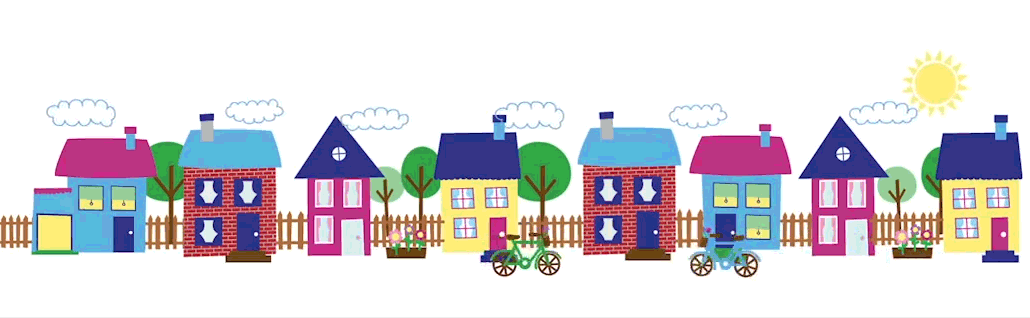

In [265]:
Image('dataset-cover-.jpeg')

#Dataset Information

The data set contains more than 2900 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete and 20 continuous)

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. 

Variable - Variable name.
Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'.
By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the 
values are categories.
Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. 
When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual').
When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF').
Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located 
(e.g. 'Neighborhood').
Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
Comments - Any general comments that occured to us.
While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).YearBuilt,TotalBsmtSF,GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. 

It is possible that this quick data examination process was a bit harsh for categorical variables. 
For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination 
I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, 
which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectactions.

In [266]:
#Load the Data

In [267]:
import pandas as pd
df=pd.read_csv("data.csv")

In [351]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Inroduction about each Attributes

The attributes are as follow:- 
    
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class MSZoning: The general zoning classification 
LotFrontage: Linear feet of street connected to property 
LotArea: Lot size in square feet Street: Type of road access 
Alley: Type of alley access LotShape: General shape of property LandContour: Flatness of the property Utilities: Type of utilities available LotConfig: Lot configuration LandSlope: Slope of property Neighborhood: Physical locations within Ames city limits Condition1: Proximity to main road or railroad Condition2: Proximity to main road or railroad (if a second is present) BldgType: Type of dwelling HouseStyle: Style of dwelling OverallQual: Overall material and finish quality OverallCond: Overall condition rating YearBuilt: Original construction date YearRemodAdd: Remodel date RoofStyle: Type of roof RoofMatl: Roof material Exterior1st: Exterior covering on house Exterior2nd: Exterior covering on house (if more than one material) MasVnrType: Masonry veneer type MasVnrArea: Masonry veneer area in square feet ExterQual: Exterior material quality ExterCond: Present condition of the material on the exterior Foundation: Type of foundation BsmtQual: Height of the basement BsmtCond: General condition of the basement BsmtExposure: Walkout or garden level basement walls BsmtFinType1: Quality of basement finished area BsmtFinSF1: Type 1 finished square feet BsmtFinType2: Quality of second finished area (if present) BsmtFinSF2: Type 2 finished square feet BsmtUnfSF: Unfinished square feet of basement area TotalBsmtSF: Total square feet of basement area Heating: Type of heating HeatingQC: Heating quality and condition CentralAir: Central air conditioning Electrical: Electrical system 1stFlrSF: First Floor square feet 2ndFlrSF: Second floor square feet LowQualFinSF: Low quality finished square feet (all floors) GrLivArea: Above grade (ground) living area square feet BsmtFullBath: Basement full bathrooms BsmtHalfBath: Basement half bathrooms FullBath: Full bathrooms above grade HalfBath: Half baths above grade Bedroom: Number of bedrooms above basement level Kitchen: Number of kitchens KitchenQual: Kitchen quality TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) Functional: Home functionality rating Fireplaces: Number of fireplaces FireplaceQu: Fireplace quality GarageType: Garage location GarageYrBlt: Year garage was built GarageFinish: Interior finish of the garage GarageCars: Size of garage in car capacity GarageArea: Size of garage in square feet GarageQual: Garage quality GarageCond: Garage condition PavedDrive: Paved driveway WoodDeckSF: Wood deck area in square feet OpenPorchSF: Open porch area in square feet EnclosedPorch: Enclosed porch area in square feet 3SsnPorch: Three season porch area in square feet ScreenPorch: Screen porch area in square feet PoolArea: Pool area in square feet PoolQC: Pool quality Fence: Fence quality MiscFeature: Miscellaneous feature not covered in other categories MiscVal: $Value of miscellaneous feature MoSold: Month Sold YrSold: Year Sold SaleType: Type of sale SaleCondition: Condition of sale

In [269]:
#Basic Checks 

In [270]:
data=df.copy()

In [271]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455        0.00        TA        TA      PConc       Gd       TA   
1456      119.00        TA        TA     CBlock       Gd       TA   
1457        0.00        Ex        Gd      Stone       TA       Gd   
1458        0.00        TA        TA     CBlock       TA       TA   
1459        0.00        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [272]:
data.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
340    341          60       RL        85.00    14191   Pave   NaN      Reg   
90      91          20       RL        60.00     7200   Pave   NaN      Reg   
804    805          20       RL        75.00     9000   Pave   NaN      Reg   
1133  1134          60       RL        80.00     9828   Pave   NaN      IR1   
571    572          20       RL        60.00     7332   Pave   NaN      Reg   
1201  1202          60       RL        80.00    10400   Pave   NaN      Reg   
1242  1243          85       RL        85.00    10625   Pave   NaN      Reg   
294    295          20       RL        80.00     9600   Pave   NaN      Reg   
668    669          20       RL          NaN    14175   Pave   NaN      Reg   
459    460          50       RL          NaN     7015   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
340          Lvl    AllPub    Inside       Gtl       Timber       Norm   
90           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
804          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1133         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
571          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1201         Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
1242         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
294          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
668          Bnk    AllPub    Corner       Mod       Sawyer       Norm   
459          Bnk    AllPub    Corner       Gtl      BrkSide       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
340        Norm     1Fam     2Story            8            5       2002   
90         Norm     1Fam     1Story            4            5       1950   
804        Norm     1Fam     1Story            5            5       1954   
1133       Norm     1Fam     2Story            8            5       1995   
571        Norm     1Fam     1Story            6            6       1959   
1201       Norm     1Fam     2Story            7            5       1998   
1242       Norm     1Fam     SFoyer            7            6       1974   
294        Norm     1Fam     1Story            6            5       1953   
668        Norm     1Fam     1Story            5            6       1956   
459        Norm     1Fam     1.5Fin            5            4       1950   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
340           2002     Gable  CompShg     VinylSd     VinylSd       None   
90            1950     Gable  CompShg     BrkFace     Wd Sdng       None   
804           1954     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1133          1995     Gable  CompShg     VinylSd     VinylSd       None   
571           1959     Gable  CompShg     WdShing     Wd Shng    BrkFace   
1201          1998     Gable  CompShg     VinylSd     VinylSd       None   
1242          1974     Gable  CompShg     Plywood     Plywood    BrkFace   
294           1953       Hip  CompShg     HdBoard     HdBoard      Stone   
668           1987     Gable  CompShg     CemntBd     Wd Sdng       None   
459           1950     Gable  CompShg     MetalSd     MetalSd     BrkCmn   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
340         0.00        Gd        TA      PConc       Gd       TA   
90          0.00        TA        TA       Slab      NaN      NaN   
804         0.00        TA        TA     CBlock       TA       TA   
1133        0.00        Gd        TA      PConc       Gd       TA   
571       207.00        TA        TA     CBlock       TA       TA   
1201        0.00        TA        TA      PConc       Gd       TA   
1242       81.00        TA        TA     CBlock       Gd       TA   
294       238.00        TA        TA     CBlock       TA       TA   
668         0.00        TA  

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [274]:
data.shape


(1460, 81)

In [275]:
data.size

118260

In [276]:
data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [277]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [278]:
data.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00   

In [279]:
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [280]:
data.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [281]:
#Transforming some numerical variables that are really categorical

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [282]:
num_list = []
cat_list = []

for column in data.columns:    
    if (data[column].dtype == "int64" or data[column].dtype == "float64"):
        num_list.append(column)
    else:       
        cat_list.append(column)
               
print("Numeric Columns:", num_list)
print("Categorical Columns:", cat_list)
print(len(num_list)+len(cat_list))

Numeric Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
Categorical Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Ga

# Univariate analysis 

#### Insights
- This plots shows how data is distributed using Histogram.

In [283]:
plt.figure(figsize=(100,100))
plotnumber = 1           
for column in num_list:
    plt.subplot(6,8,plotnumber)
    sns.histplot(data[column],kde=True)
    plt.xlabel(column,fontsize=100)
    plt.ylabel('Count',fontsize=100)
    plotnumber+=1       

    
plt.tight_layout()

# Insights

'''MSSubClass
-Its not normally distrubuted
-Most of the range is between 20 to 50  which is in normal range
-It is highly skew toward right side of the graph i.e high positive skewness
-It describe the max value of MSSubClass is 20

LotFrontage
-It is normally distrubuted curve
-maximum range of LotFrontage from 60 to 70

LotArea
-It is normally distrubuted curve
-maximum range of LotFrontage from 25 to 24

OverallQual
-It is not normally distrubuted curve
-maxnimum range of OverallQual from 5 to 6

OverallCond
-It is normally distrubuted with little positive skewness
-maximum range of OverallCond from 5 to 6

MasVnrArea
-It is normally distrubuted with little positive skewness
-It describe the max value of MasVnrArea is 0

BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
-These attribute are normally distributed curve.

BsmtFullBath,BsmtHalfBath
-It is a normally distrubuted with little positive skewness
-It describe the max value is 0 

FullBath,HalfBath
-It is a normally distrubuted with little positive skewness
-It describe the max value of FullBath is 2 and HalfBath is 0

BedroomAbvGr
-It is not a normally distrubuted curve

KitchenAbvGr
-It is normally distrubuted curve

TotRmsAbvGrd
-It is normally distrubuted curve

Fireplaces
-It is not a normally distrubuted curve

GarageYrBlt
-It is not a normally distrubuted curve
-It is highly skew toward left side of the graph i.e high negative skewness
 
GarageCars
-It is not a normally distrubuted curve

WoodDeckSF,OpenPorchSF
-It is normally distrubuted with little positive skewness

EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
-These attribute are normally distributed curve  with little positive skewness.

MoSold
-It is a normally distrubuted with little positive skewness

YrSold
-It is not normally distrubuted curve'''

#### Insights
#- This plots shows the count of data using Bar Plot.

In [284]:
plt.figure(figsize=(100,100))
plotnumber = 1           
for column in cat_list:
    plt.subplot(6,8,plotnumber)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column,fontsize=100)
    plt.ylabel('Count',fontsize=100)
    plotnumber+=1       

plt.tight_layout()
    

#Insights

'''In MSZoning RL has maximum value
In Street Pave has maximum value
In Alley Grvl has maximum value
In LotShape Reg has maximum value
In LandContour Lvl has maximum value 
In Utilities Allpub has maximum value 
In LotConfig Inside has maximum value
In LandSlope Gt1 has maximum value
In Neighborhood Names has maximum value
In Condition1 and  Condition2 Norm  has maximum value
In BldgType 1Fam has maximum value
In RoofStyle Gable has maximum value
In RoofMatl CompShg has maximum value
In Exterior1st and Exterior2nd VinylSd  has maximum value
In ExterQual,BsmtCond,BsmtQual,KitchenQual,GarageQual and GarageCond  TA has maximum value
In Foundation PConc has maximum value
In BsmtFinType1 and BsmtFinType2 Unf has maximum value
In Heating GasA has maximum value
In HeatingQC Ex has maximum value
In CentralAir Y has maximum value
In Electrical SBrkr has maximum value
In Functional Typ has maximum value
In FireplaceQu Gd has maximum value
In GarageType Attchd has maximum value
In GarageFinish Unf has maximum value
In PavedDrive Y has maximum value
In PoolQC Gd has maximum value
In Fence MnPrv has maximum value
In MiscFeature Shed has maximum value
In SaleType WD has maximum value
In SaleCondition Normal has maximum value'''

'''Description of each category,

Ex - Excellent (100+ inches) 
Gd - Good (90-99 inches)
TA - Typical (80-89 inches)
Fa - Fair (70-79 inches)
Po - Poor (<70 inches
NB - No Basement
Gd - Good Exposure
Av - Average Exposure (split levels or foyers typically score average or above) -
Mn - Mimimum Exposure
No - No Exposure
NB - No Basement'''

# Bivariate Analysis refers to plots between input variables and target variable

#Log transformation of target attribute
''''The log transformation is often used to reduce skewness of a measurement variable.
It Helps in multiple Linear regression,remove Multicollinearity(Highly correlated) and Homoscedasticity(correlation is not linear)'''

<Axes: xlabel='SalePrice', ylabel='Count'>

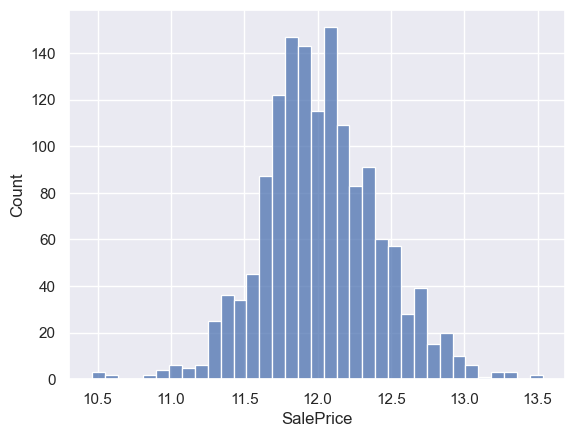

In [285]:
data['SalePrice']= np.log1p(data['SalePrice'])
sns.histplot(data['SalePrice'])

<Axes: title={'center': 'Saleprice distribution'}, xlabel='SalePrice', ylabel='Frequency'>

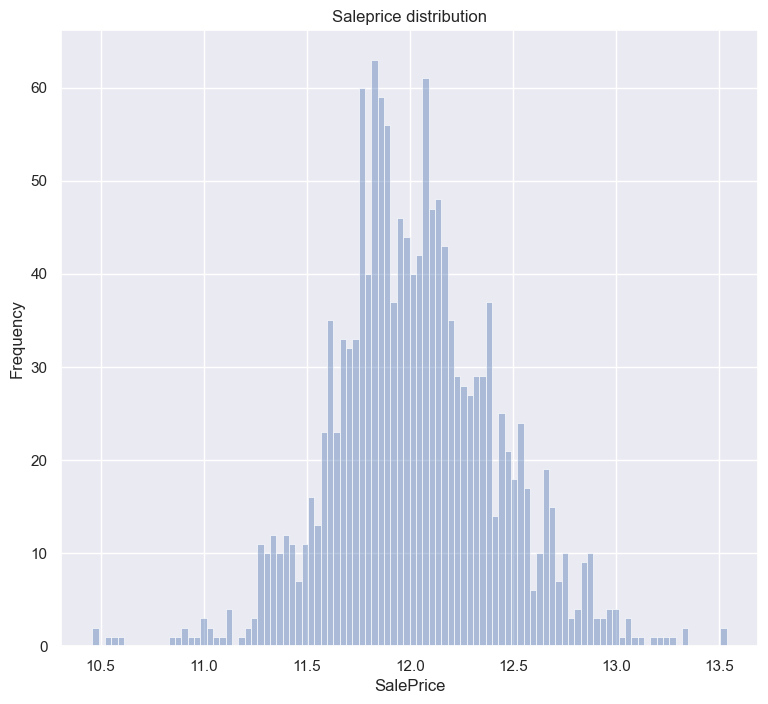

In [286]:
plt.figure(figsize = (9,8))
plt.ylabel("Frequency")
plt.title("Saleprice distribution")
sns.histplot(data['SalePrice'], bins =100,alpha =0.4)

In [287]:
numerical = data.select_dtypes(include = ["int64","float64"]).columns

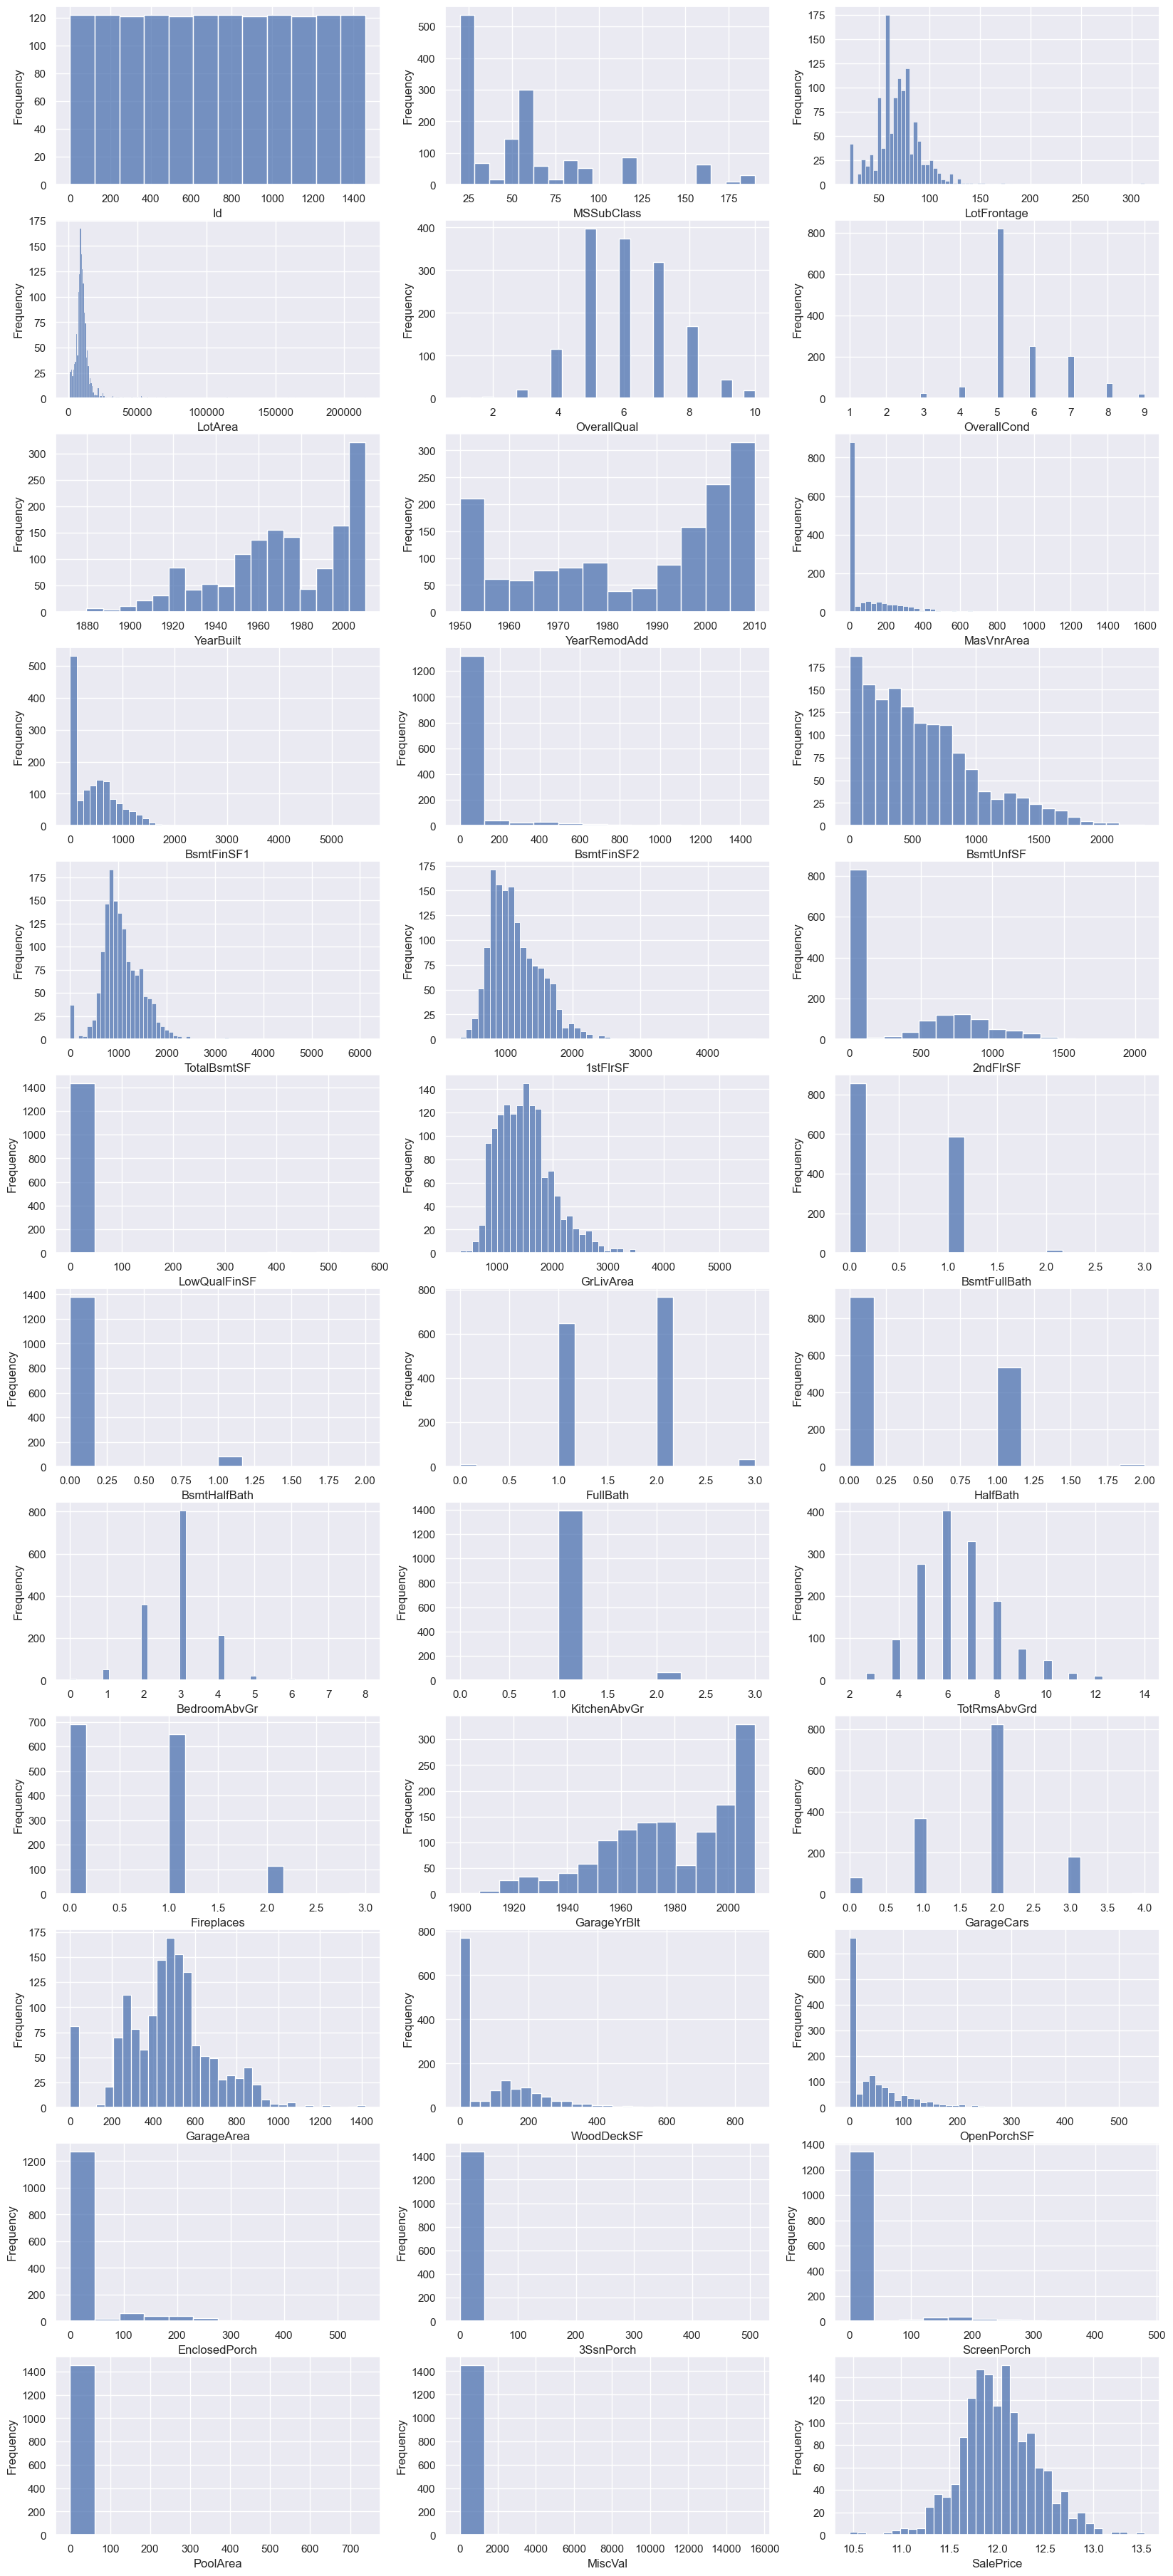

In [288]:
nrows = 13
ncols = 3

plt.figure(figsize =(20,50))
for i in enumerate(numerical):
    plt.subplot(nrows,ncols,i[0]+1)
    plt.ylabel("Frequency")
    name = i[1];
    
    sns.histplot(data[name])


#Insights
'''MSSubClass
-Most of the frequency of SalePrice distributed between 25 to 75

LotFrontage
-Most of the frequency of SalePrice distributed between 50 to 100

OverallQual
-Most of the frequency of SalePrice distributed between 4 to 8

OverallCond
-Frequency of SalePrice is maximum at 5
 
YearBuilt
-Fequency of SalePrice is maximum in 2005 year 

YearRemodAdd
-Frequency of SalePrice is maximum in 2005 year

MasVnrArea
-Frequency of SalePrice is maximum at 0

BstmFinSF1,BsmtUnfSF,TotalBsmtSF
-Most of frequency of SalePrice distributed between 0 to 2000

GrLivArea
-Most of the frequency is distributed between 1000 to 3000
 
GarageYrBlt
-Most of the frequency of SalePrice distributed between 0 to 400
 
GarageCars
-frequency of SalePrice is maximum at 2

GarageArea
-Most of the frequency distributed between 200 to 800

WoodDeckSF,OpenPorchSF
-Most of the frequency of SalePrice distributed between 0 to 200

EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
-Most of the frequency of SalePrice distributed between 0 to 50


# Data Preprocessing and Feature Engineering

# Step 1 Handling the missing values

In [289]:

data.isna().sum()[data.isna().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

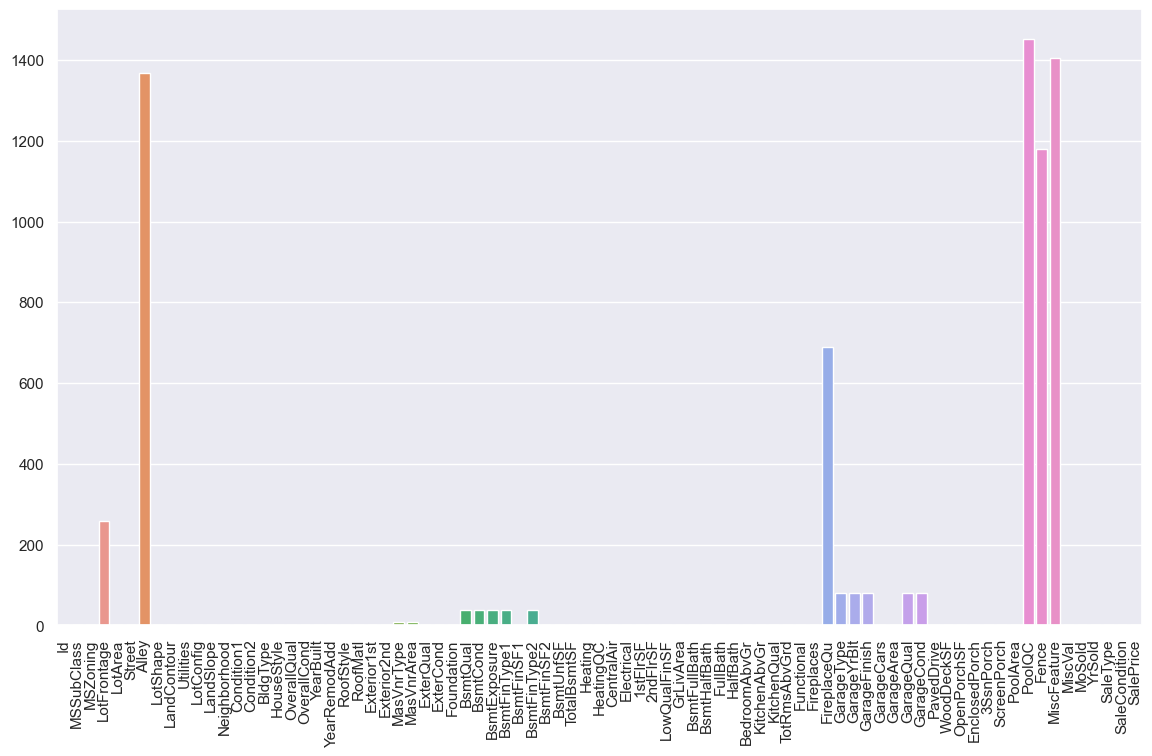

In [290]:
#Finding columns with more than 90% missing value
missing_values = data.isna().sum()
plt.figure(figsize=(14, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)

plt.xticks(rotation=90)
plt.show()




Missing values is maximum in Alley,PoolQC,Fence,MiscFeature around 90%.

In [291]:
def summary(data):
    summ = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summ['missing#'] = data.isna().sum().values
    summ['missing%'] = (data.isna().sum().values*100)/len(df)
    summ['uniques'] = data.nunique().values
    summ['count'] = data.count().values
    desc = pd.DataFrame(data.describe().T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    summ['mean'] = desc['mean']
    return summ


In [292]:
summary(data).style.background_gradient(cmap='Blues')

# Step 2 Handling the corrupted data.

In [293]:
''' Replacing missing data with None (because for all of the following attributes,
based on the competition documentation, NA means no value means (i.e. None)'''

data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

In [294]:
'''LotFrontage : Since the area of each street connected to the house property 
most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood'''

data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [295]:
#### Replacing missing data with None

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [296]:
#### Replacing missing data with 0 (Since No garage = no cars in such garage.)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [297]:
#### Missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [298]:
#### For all these categorical basement-related features, NaN means that there is no basement.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [299]:
#### NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [300]:
#### 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [301]:
### For this categorical feature all records are "AllPub",except for one "NoSeWa" and 2 NA .
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])

In [302]:
#### Data description says NA means typical
data["Functional"] = data["Functional"].fillna("Typ")

In [303]:
#### It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [304]:
#### Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [305]:
#### Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [306]:
#### Fill in again with most frequent which is "WD"
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [307]:
#### Na most likely means No building class. We can replace missing values with None
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [308]:
#Is there any remaining missing value ?
#Check remaining missing value if any 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()


Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [309]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [310]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave  None      Reg   
1   2          20       RL        80.00     9600   Pave  None      Reg   
2   3          60       RL        68.00    11250   Pave  None      IR1   
3   4          70       RL        60.00     9550   Pave  None      IR1   
4   5          60       RL        84.00    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [311]:
data_rows=data[data.duplicated()]

In [312]:
data_rows

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

'''Insight:
There is no duplicated rows in dataset.'''

# Step 3:-Checking the outliers

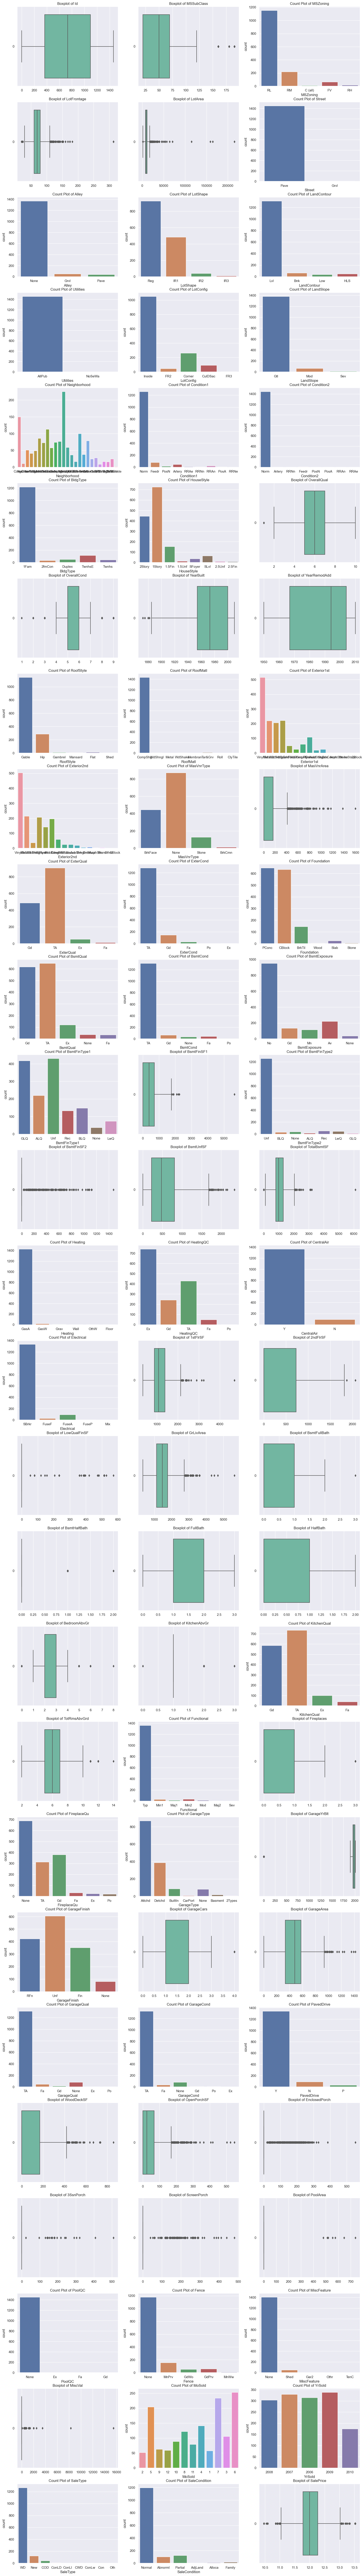

In [313]:

fig, axes = plt.subplots(27,3, figsize=(20, 150))
for i, (column_name, column_data) in enumerate(data.items()):
    sns.set(style="whitegrid")
    row = i//3
    col = i%3
    if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
        sns.boxplot(data=column_data, orient="h", palette="Set2", ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {column_name}')
    else:
        sns.countplot(x=column_name, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Count Plot of {column_name}')
plt.show()

'''Insight:
Outliers
Outliers is uncommon data in a particular column. 
Generally, Outliers should be removed carefully or transform/ Scale data.But as This dataset is tiny..I won't drop any data but transform.

There is a outliers in below mentioned column.
columns_having_outliers = 'MSSubClass','OverallQual','OverallCond','BsmtFinSF1','2ndFlrSF','BsmtFullBath','BedroomAbvGr','Fireplaces'
'''

# Step 4 heatmap of the correlation

The .corr() function returns a value between -1 to 1.

if value is -1 then 2 columns are highly correlated with each other in negative way, 0 means no relation 1 means again highly related in a positive way

Generally corr> .8 or -.8 and 0 correlation should be removed for best result or best prediction.

One example:
if house has less GarageArea then definitely there will be less GarageCars. One is co-related to another. So I can just use GarageArea column or GarageCars column.



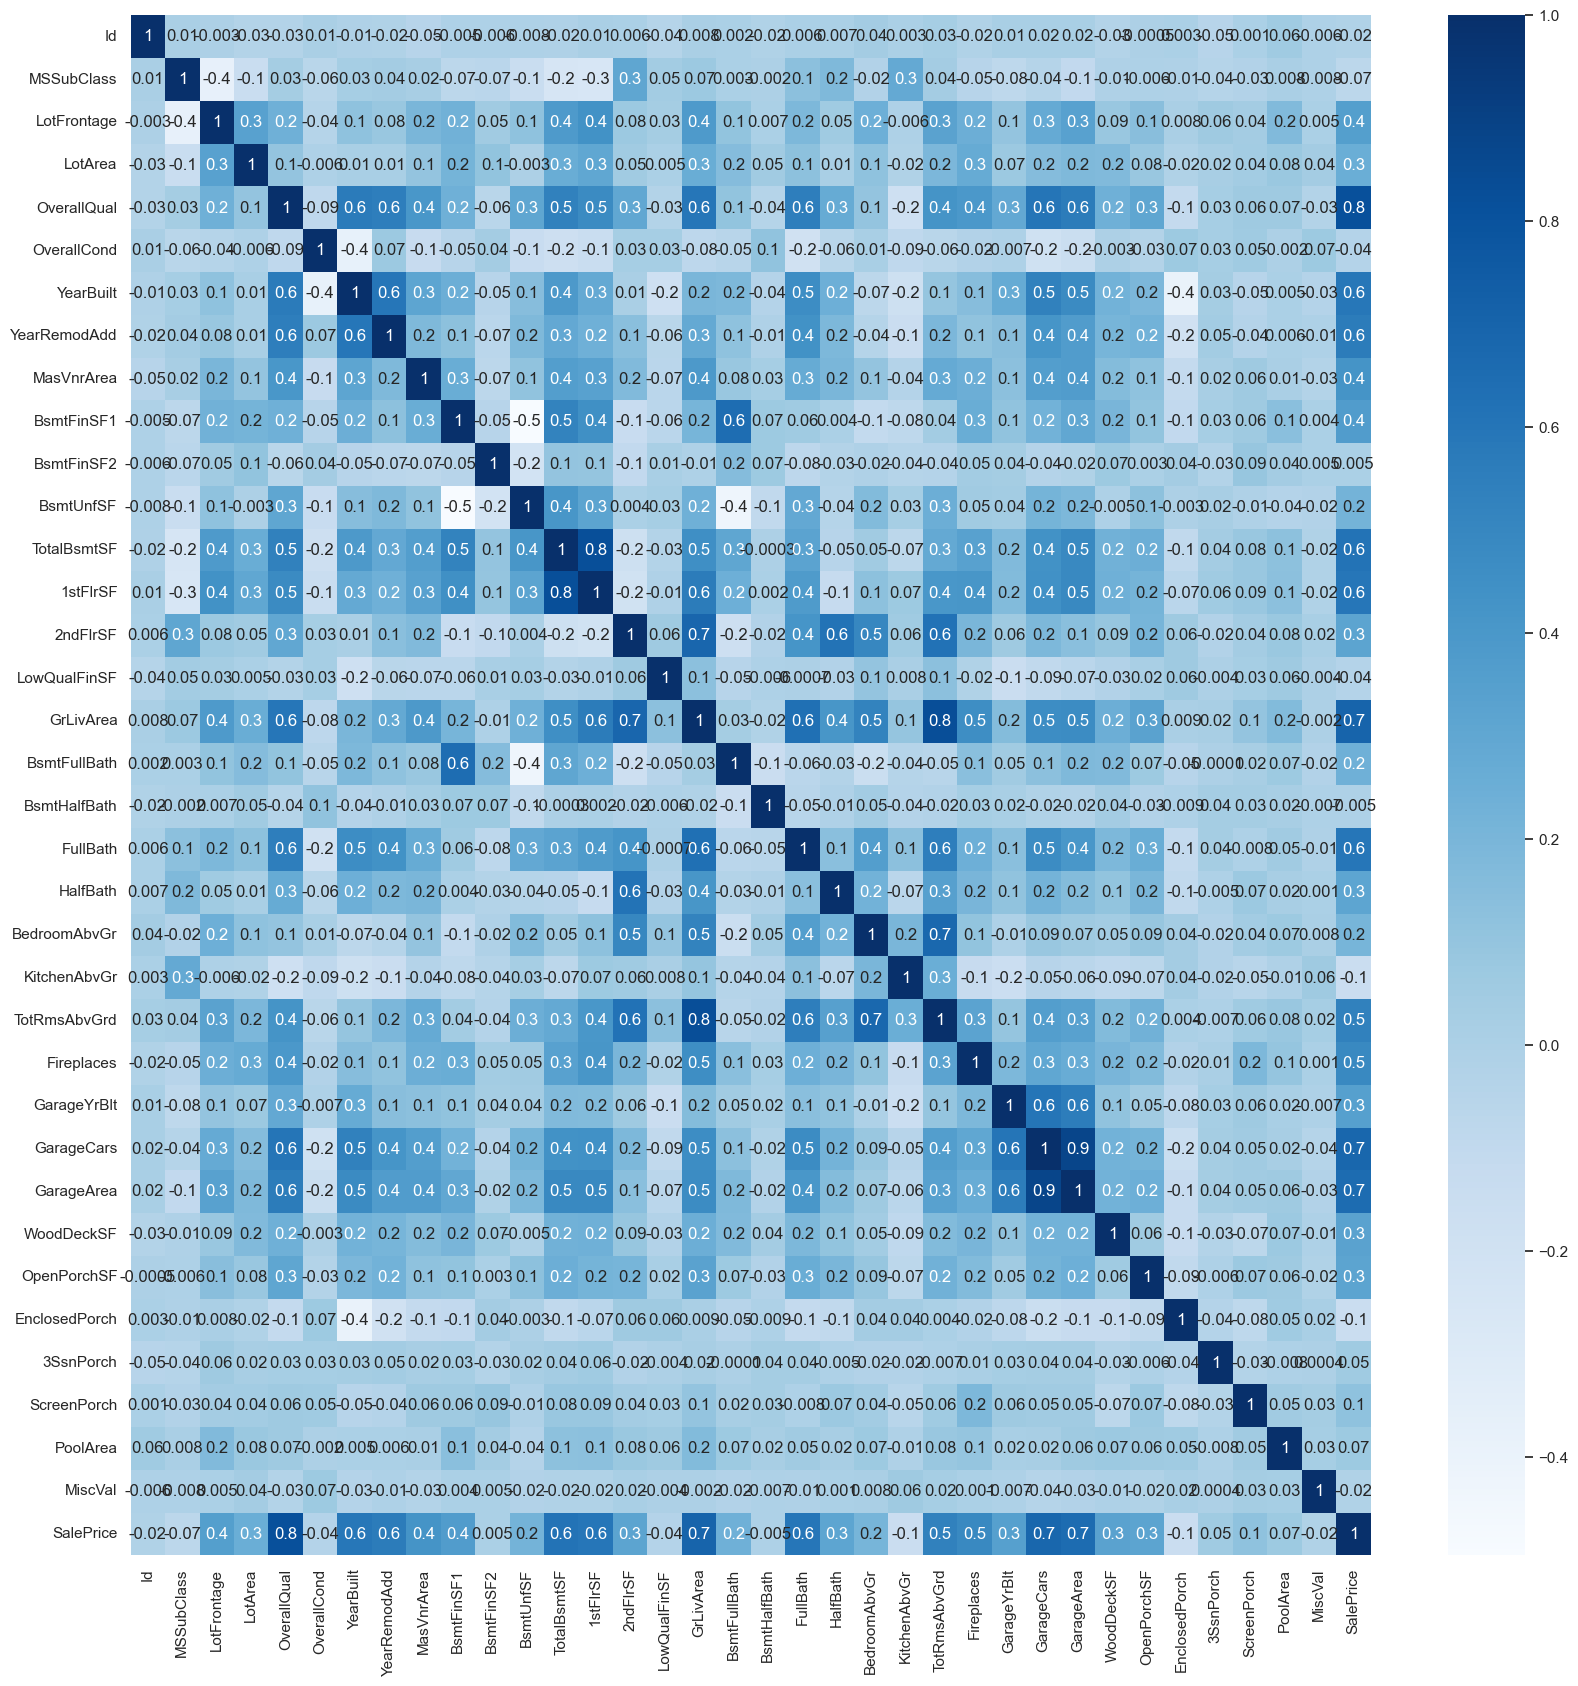

In [314]:
cor=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

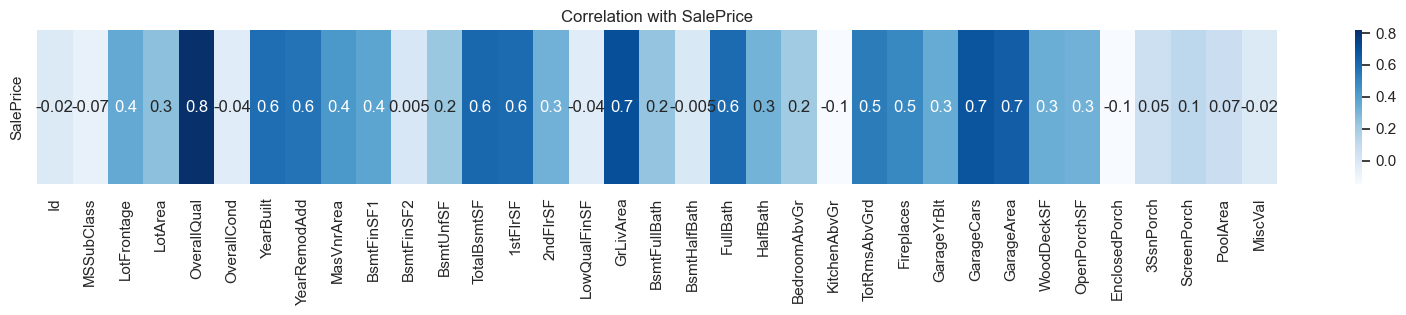

In [315]:
# Extract the correlation of 'SalePrice' with other factors
correlation_with_saleprice = cor['SalePrice']

# Create a heatmap of the correlation
plt.figure(figsize=(20, 2))
sns.heatmap(data=correlation_with_saleprice[:-1].to_frame().T, annot=True, cmap='Blues', fmt='.1g')
plt.title('Correlation with SalePrice')
plt.show()

In [316]:
# Find highly correlated features
highly_correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:  
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Convert the set of highly correlated features to a list
highly_correlated_features_list = list(highly_correlated_features)

# Print or inspect the highly correlated features
print(highly_correlated_features_list)

['OverallQual', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd', 'SalePrice', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF']


In [317]:
highly_correlated_features=['OverallQual', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF']

In [318]:
data.drop(highly_correlated_features ,axis=1,inplace=True)

Insights:
Plots show relation between 'SalePrice' with others. I can remove columns who have correlation >.8 . 
But I will select Features based on Feature importance.
Highly_related_columns are 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'

Important columns in the dataset which will enrich my training process is essential to be chosen because:-
-To reduce memory size
-To reduce time on training a model



In [319]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave  None      Reg   
1   2          20       RL        80.00     9600   Pave  None      Reg   
2   3          60       RL        68.00    11250   Pave  None      IR1   
3   4          70       RL        60.00     9550   Pave  None      IR1   
4   5          60       RL        84.00    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallCond  YearBuilt  YearRemodAdd  \
0       Norm     1Fam     2Story            5       2003          2003   
1       Norm     1Fam     1Story            8       1976          1976   
2       Norm     1Fam     2Story            5       2001          2002   
3       Norm     1Fam     2Story            5       1915          1970   
4       Norm     1Fam     2Story            5       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None        0.00        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None        0.00        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace      350.00        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC  \
0         706          Unf           0        150    GasA        Ex   
1         978          Unf           0        284    GasA        Ex   
2         486          Unf           0        434    GasA        Ex   
3         216          Unf           0        540    GasA        Gd   
4         655          Unf           0        490    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0          Y      SBrkr       854             0             1             0   
1          Y      SBrkr         0             0             0             1   
2          Y      SBrkr       866             0             1             0   
3          Y      SBrkr       756             0             1             0   
4          Y      SBrkr      1053             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  \
0         2         1             3             1          Gd        Typ   
1         2         0             3             1          TA        Typ   
2         2         1             3             1          Gd        Typ   
3         1         0             3             1          Gd        Typ   
4         2         1             4             1          Gd        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual  \
0           0        None     Attchd      2003.00          RFn         TA   
1           1          TA     Attchd      1976.00          RFn         TA   
2           1          TA     Attchd      2001.00          RFn         TA   
3           1          Gd     Detchd      1998.00          Unf         TA   
4           1          TA     Attc

In [320]:
data.shape

(1460, 74)

# Step-5 Scaling

In [321]:
from sklearn.preprocessing import StandardScaler
import numpy as np
def scaler(data):
    scaler = StandardScaler() 
    num_list = data.select_dtypes(include=[np.number]).columns
    data[num_list] = scaler.fit_transform(data[num_list])
    print("Done Scaling Features")
    return data
data = scaler(data)

Done Scaling Features


In [322]:
data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
307 -1.00       -0.16       RM        -0.45    -0.26   Pave  Grvl      IR1   
250 -1.14       -0.64       RL        -0.68    -0.52   Pave  None      IR1   
420 -0.73        0.78       RM         0.35    -0.35   Pave  None      Reg   
933  0.48       -0.87       RL        -0.32    -0.20   Pave  None      Reg   
601 -0.30       -0.16       RM        -0.90    -0.15   Pave  None      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
307         Lvl    AllPub    Inside       Gtl       IDOTRR     Artery   
250         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
420         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
933         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
601         Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   

    Condition2 BldgType HouseStyle  OverallCond  YearBuilt  YearRemodAdd  \
307       Norm     1Fam     1.5Fin         1.28      -1.70         -1.69   
250       Norm     1Fam     1Story        -3.21      -1.04         -0.91   
420       Norm   Duplex     SFoyer        -0.52       0.85          0.64   
933       Norm     1Fam     1Story        -0.52       1.08          0.93   
601       Norm     1Fam     1.5Fin         0.38      -1.13         -1.69   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
307     Gable  CompShg     MetalSd     MetalSd       None       -0.57   
250     Gable  CompShg     Wd Sdng     Plywood       None       -0.57   
420     Gable  CompShg     VinylSd     VinylSd    BrkFace        0.54   
933     Gable  CompShg     VinylSd     VinylSd    BrkFace        0.59   
601     Gable  CompShg     Wd Sdng     Wd Sdng       None       -0.57   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
307        TA        Fa     CBlock       TA       TA           No   
250        TA        Po     CBlock       TA       TA           No   
420        TA        Gd      PConc       Gd       Gd           Gd   
933        Gd        TA      PConc       Gd       TA           Av   
601        TA        Gd      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating  \
307          Unf       -0.97          Unf       -0.29      -0.56    GasA   
250          Unf       -0.97          Unf       -0.29       0.36    GasA   
420          GLQ        1.90          Unf       -0.29      -1.20    GasA   
933          GLQ       -0.93          Unf       -0.29       2.07    GasA   
601          Unf       -0.97          Unf       -0.29       0.48    GasA   

    HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
307        TA          Y      FuseA      0.06         -0.12         -0.82   
250        Ex          Y      SBrkr     -0.80         -0.12         -0.82   
420        Ex          Y      SBrkr     -0.80         -0.12          3.04   
933        Ex          Y      SBrkr     -0.80         -0.12         -0.82   
601        TA          Y      SBrkr      0.57         -0.12         -0.82   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
307         -0.24     -1.03     -0.76          0.16         -0.21          Fa   
250         -0.24     -1.03     -0.76          0.16         -0.21          Fa   
420         -0.24      0.79     -0.76         -1.06          4.33          TA   
933         -0.24      0.79     -0.76          0.16         -0.21          Gd   
601         -0.24     -1.03      1.23          0.16         -0.21          Gd   

    Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
307        Typ       -0.95        None       None        -4.12         None   
250        Mod       -0.95        None       None        -4.12         None   
420        Typ       -0.95        None     Attchd         0.28          Fin   
933        Typ       -0.95        None     Attchd         0.30   

# step-6  Converting categorical data to numerical

No ML model can be trained using object or string variables.
So 1st convert string variable to numeric value.

In [323]:
#Transforming these two numerical column to categorical column as they contain discreet values not a continous values
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
    

In [324]:
cols1= ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
cols2= ['ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC'] 
cols3= ['BsmtFinType1', 'BsmtFinType2']
# replace dictionary
for col in cols1:
    data[col].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, inplace= True)

for col in cols2:
    data[col].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'other':0}, inplace= True)

for col in cols3:
    data[col].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None':0}, inplace= True)
    


In [325]:
data['Neighborhood'] = data.apply(lambda x: 'others' if x['Neighborhood'] not in ('NAmes', 'CollgCr', 'OldTown', 'Edwards') else x['Neighborhood'], axis=1)
data['Condition1']=data.apply(lambda x: 'others' if x['Condition1'] not in ('Norm', 'Feedr', 'Artery') else x['Condition1'], axis=1)
data['Condition2']=data.apply(lambda x: 'others' if x['Condition2'] not in ('Norm', 'Feedr') else x['Condition2'], axis=1)
data['HouseStyle']=data.apply(lambda x: 'others' if x['HouseStyle'] not in ('1Story', '2Story','1.5Fin') else x['HouseStyle'], axis=1)
data['RoofStyle']=data.apply(lambda x: 'others' if x['RoofStyle'] not in ('Gable', 'Hip') else x['RoofStyle'], axis=1)
data['RoofMatl']=data.apply(lambda x: 'others' if x['RoofMatl'] not in ('CompShg') else x['RoofMatl'], axis=1)
data['Exterior1st']=data.apply(lambda x: 'others' if x['Exterior1st'] not in ('VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood') else x['Exterior1st'], axis=1)
data['Exterior2nd']=data.apply(lambda x: 'others' if x['Exterior2nd'] not in ('VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood') else x['Exterior2nd'], axis=1)
data['MasVnrType']=data.apply(lambda x: 'others' if x['MasVnrType'] not in ('BrkFace','Stone') else x['MasVnrType'], axis=1)
data['Foundation']=data.apply(lambda x: 'others' if x['Foundation'] not in ('PConc','CBlock','BrkTil') else x['Foundation'], axis=1)
data['Heating']=data.apply(lambda x: 'others' if x['Heating'] not in ('GasA') else x['Heating'], axis=1)
data['Electrical']=data.apply(lambda x: 'others' if x['Electrical'] not in ('SBrkr') else x['Electrical'], axis=1)
data['Functional']=data.apply(lambda x: 'others' if x['Functional'] not in ('Typ') else x['Functional'], axis=1)
data['GarageType']=data.apply(lambda x: 'others' if x['GarageType'] not in ('Attchd','Detchd') else x['GarageType'], axis=1)
data['SaleType']=data.apply(lambda x: 'others' if x['SaleType'] not in ('WD','New','COD') else x['SaleType'], axis=1)
data['SaleCondition']=data.apply(lambda x: 'others' if x['SaleCondition'] not in ('Normal') else x['SaleCondition'], axis=1)



In [326]:
# Columns has ordinal categories.
dict1={
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}, 
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}, 
    'CentralAir': {'Y': 1, 'N': 0}, 
    'PavedDrive' : {'N': 0, 'P': 1, 'Y': 2}, 
    'Fence' : {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}, 
    'Alley': {'Pave': 2, 'Grvl': 1,  'None': 0}, 
    'MiscFeature': {'TenC': 4, 'Othr': 3,'Gar2': 2, 'Shed': 1,  'None': 0}, 
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev':0}, 
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, "None": 0}, 
    'Street': {'Grvl': 0, 'Pave': 1}, 
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3':1}, 
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}, 
    'MSSubClass': {20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75:8, 80:9, 85:10, 90:11, 120: 12, 150:13, 160: 14, 180: 15, 190: 16}
    ,
    'YrSold': {'2009': 1, '2007': 2, '2006': 3, '2008': 4, '2010': 5},
    'MoSold': {6: 1, 7: 2, 5: 3, 4 : 4, 8: 5, 3: 6, 10: 7, 11:8, 9:9, 12:10, 1:11, 2: 12},
    'MSZoning':{'RL':4,'RM':3,'FV':2,'RH':1,'C (all)':0},
    'LandContour':{'Lvl':3,'Bnk':2,'HLS':1,'Low':0},
    'LotConfig':{'Inside':4,'Corner':3,'CulDSac':2,'FR2':1,'FR3':0},
    'Neighborhood':{'NAmes':5, 'CollgCr' : 4, 'OldTown':3, 'Edwards':2, 'others':1},
    'BldgType':{'1Fam':4,'TwnhsE':3,'Duplex':2,'Twnhs':1,'2fmCon':0},
    'Condition1':{'Norm':4,'Feedr':3,'Artery':2,'others':1},
    'Condition2':{'Norm':3,'Feedr':2,'others':1},
    'HouseStyle':{'1Story':4,'2Story':3,'1.5Fin':2,'others':1},
    'RoofStyle':{'Gable':3,'Hip':2,'others':1},
    'RoofMatl':{'CompShg':2,'others':1},
    'Exterior1st':{'VinylSd':6,'HdBoard':5,'MetalSd':4,'Wd Sdng':3,'Plywood':2,'others':1},
    'Exterior2nd':{'VinylSd':6,'MetalSd':5,'HdBoard':4,'Wd Sdng':3,'Plywood':2,'others':1},
    'MasVnrType':{'BrkFace':3,'Stone':2,'others':1},
    'Foundation':{'PConc':4,'CBlock':3,'BrkTil':2,'others':1},
    'Heating':{'GasA':2,'others':1},
    'Electrical':{'SBrkr':2,'others':1},
    'Functional':{'Typ':2,'others':1},
    'GarageType':{'Attchd':3,'Detchd':2,'others':1},
    'SaleType':{'WD':4,'New':3,'COD':2,'others':1},
    'SaleCondition':{'Normal':2,'others':1}   
     }

# replacement
for col, values in dict1.items():
    data[col].replace(values, inplace= True)

In [327]:
data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0 -1.73        0.07         4        -0.23    -0.21       1      0         4   
1 -1.73       -0.87         4         0.44    -0.09       1      0         4   
2 -1.73        0.07         4        -0.10     0.07       1      0         3   
3 -1.72        0.31         4        -0.45    -0.10       1      0         3   
4 -1.72        0.07         4         0.62     0.38       1      0         3   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          4          4          2             4           4   
1            3          4          1          2             1           3   
2            3          4          4          2             4           4   
3            3          4          3          2             1           4   
4            3          4          1          2             1           4   

   Condition2  BldgType  HouseStyle  OverallCond  YearBuilt  YearRemodAdd  \
0           3         4           3        -0.52       1.05          0.88   
1           3         4           4         2.18       0.16         -0.43   
2           3         4           3        -0.52       0.98          0.83   
3           3         4           3        -0.52      -1.86         -0.72   
4           3         4           3        -0.52       0.95          0.73   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          3         2            6            6           3        0.51   
1          3         2            4            5           1       -0.57   
2          3         2            6            6           3        0.33   
3          3         2            3            1           1       -0.57   
4          3         2            6            6           3        1.37   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          4          3           4         4         3             1   
1          3          3           3         4         3             4   
2          4          3           4         4         3             2   
3          3          3           2         3         4             1   
4          4          3           4         4         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Heating  \
0             6        0.58             1       -0.29      -0.94        2   
1             5        1.17             1       -0.29      -0.64        2   
2             6        0.09             1       -0.29      -0.30        2   
3             5       -0.50             1       -0.29      -0.06        2   
4             6        0.46             1       -0.29      -0.17        2   

   HeatingQC  CentralAir  Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          5           1           2      1.16         -0.12          1.11   
1          5           1           2     -0.80         -0.12         -0.82   
2          5           1           2      1.19         -0.12          1.11   
3          4           1           2      0.94         -0.12          1.11   
4          5           1           2      1.62         -0.12          1.11   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0         -0.24      0.79      1.23          0.16         -0.21            4   
1          3.95      0.79     -0.76          0.16         -0.21            3   
2         -0.24      0.79      1.23          0.16         -0.21            4   
3         -0.24     -1.03     -0.76          0.16         -0.21            4   
4         -0.24      0.79      1.23          1.39         -0.21            4   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           2       -0.95            0           3         0.30             2   
1           2        0.60            3           3         0.24             2   
2           2        0.60            3        

# Modelling


#Getting the new train and test sets.

In [328]:
#Step 1 Independent and dependent variable creation
## Creating independent and dependent variable
X = data.drop('SalePrice', axis=1)#independent variable 
y = data.SalePrice#dependent variable 

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [330]:
data.dtypes


Id               float64
MSSubClass       float64
MSZoning           int64
LotFrontage      float64
LotArea          float64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
Heating            int64
HeatingQC          int64
CentralAir         int64


# Model Selection

#01)LinearRegresssion

In [331]:
from sklearn.linear_model import LinearRegression

In [332]:
linear_mse=LinearRegression()

In [333]:
linear_mse.fit(X_train,y_train)

LinearRegression()

In [335]:
#predict the y_pred values from model
y_pred=linear_mse.predict(X_test)   


array([-2.22321383e-01,  1.57094263e+00, -6.81944168e-01,  1.21998156e-02,
        1.57229182e+00, -1.69930717e+00,  7.17149474e-01, -1.84962266e-01,
       -1.59556885e+00, -4.08929320e-01, -2.45911332e-01, -7.63886492e-01,
       -1.60382331e+00,  4.61671293e-01,  3.15192348e-01, -4.05841226e-01,
        7.35592999e-01, -6.73154505e-01, -8.60621484e-01,  5.81840856e-01,
       -2.56806054e-01,  1.70681962e-01,  4.90464542e-01, -3.21976204e-01,
        5.49369587e-01, -2.13364054e-02,  6.53293798e-01, -1.00090308e+00,
        3.12969728e-01,  2.76300863e-01, -1.22171643e+00,  1.12623950e+00,
        9.15210523e-01, -8.47025072e-01,  1.03362791e+00, -3.09848939e-01,
       -6.45933089e-01,  7.02680183e-01,  1.45330786e+00, -1.39242646e+00,
       -5.21380970e-01,  8.64190932e-01, -1.02908218e+00,  1.62036385e+00,
       -6.79862489e-01, -1.28303008e+00, -1.00846324e+00, -5.27558921e-01,
        2.20760795e+00, -6.64425185e-01, -9.61315004e-01,  4.82554267e-01,
       -5.30063312e-01,  

In [355]:
#Evaluate linear Regression model:

linear_mse=mean_squared_error(y_test,y_pred)   #actual/true values compared with predicted value
linear_r2=r2_score(y_test,y_pred)

print(linear_mse)
print(linear_r2)

0.16192721871319407
0.8485038377314806


#02) Lasso

In [339]:
# parameters
alphas = [0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  mean_cv_scores = -cv_scores.mean()

  if mean_cv_scores < best_score:
    best_score = mean_cv_scores
    best_alpha = alpha
    print(best_alpha) #0.001
    print(best_score) #0.1892161029880953

0.001
0.5028445289477708
0.01
0.21708559282252032


In [340]:
# Evaluate lasso model
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

y_pred = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
print(lasso_mse) #0.16094579320983038
print(lasso_r2) #0.8494220415917927

0.18620507099589578
0.825789920465565


#03) Ridge

In [343]:
ridge = Ridge()
parameters = {'alpha': alphas}

ridge_model = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [344]:
#Evaluate ridge model:
best_ridge = ridge_model.best_estimator_
y_pred = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)
print(ridge_mse) # 0.16051575629114256
print(ridge_r2)  # 0.8498243763155823

0.1868230109925307
0.8252117870378043


#04)Elastic Net

In [356]:
l1_ratios = [0.2, 0.5, 0.8]
elastic_net = ElasticNet()
parameters = {'alpha':alphas, 'l1_ratio': l1_ratios}

elastic_net_model = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_net_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [346]:
#Evaluate elastic_net model:
best_elastic_net = elastic_net_model.best_estimator_
y_pred = best_elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, y_pred)
elastic_net_r2 = r2_score(y_test, y_pred)
print(elastic_net_mse) # 0.17022118159997723
print(elastic_net_r2)  # 0.8407441568246486

0.19854827534797823
0.8142418428520747


#05) Support Vector Machine (SVM)


In [347]:
svr = SVR()
parameters = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svr_model = GridSearchCV(svr, parameters, scoring='neg_mean_squared_error', cv=5)
svr_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [348]:
#Evaluate SVM model:
best_svr = svr_model.best_estimator_
y_pred = best_svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)
print(svr_mse) # 0.11562300344633882
print(svr_r2)  # 0.8918252198038102

0.16192721871319407
0.8485038377314806


# Summary

In [349]:
final_results = pd.DataFrame({"Model": ["Linear Regression", "Lasso", "Ridge", "Elastic Net", "SVM"],
                              "MSE": [linear_mse, lasso_mse, ridge_mse, elastic_net_mse, svr_mse],
                              "R-Squared": [linear_r2, lasso_r2, ridge_r2, elastic_net_r2, svr_r2]})
final_results

Model  MSE  R-Squared
0  Linear Regression 0.20       0.82
1              Lasso 0.19       0.83
2              Ridge 0.19       0.83
3        Elastic Net 0.20       0.81
4                SVM 0.16       0.85

# Visualization of models

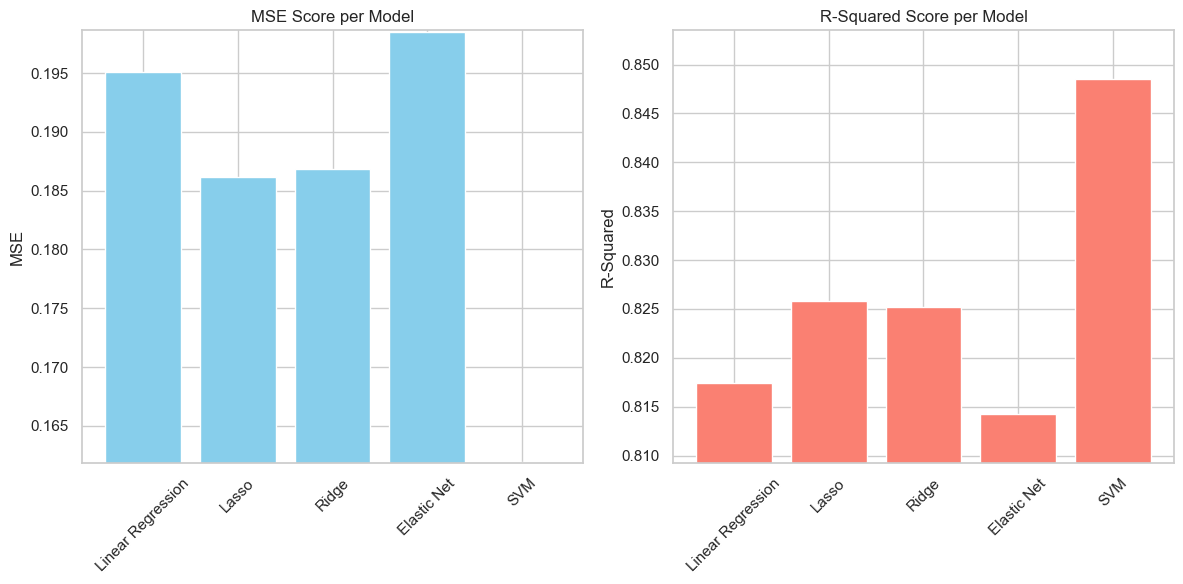

In [361]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(final_results["Model"], final_results["MSE"], color='skyblue')
plt.title("MSE Score per Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)
mse_min, mse_max = final_results["MSE"].min(), final_results["MSE"].max()
plt.ylim(mse_min - 0.0001, mse_max + 0.0001)

plt.subplot(1, 2, 2)
plt.bar(final_results["Model"], final_results["R-Squared"], color='salmon')
plt.title("R-Squared Score per Model")
plt.ylabel('R-Squared')
plt.xticks(rotation=45)
r2_min, r2_max = final_results["R-Squared"].min(), final_results["R-Squared"].max()
plt.ylim(r2_min - 0.005, r2_max + 0.005)

plt.tight_layout()
plt.show()

# Evaluation of model

We evaluate the quality of the model using the score method,
which for regression models returns the value R^2. 
R^2, also known as the coefficient of determination, is an indicator of the quality of the regression model and
takes values from 0 to 1. 
The value 1 corresponds to the ideal predictive ability, and 
the value 0 corresponds to the constant of the model, which only predicts the mean value of the answers in the training set.

The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.
It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. 

### INSIGHTS FROM CLASSIFICATION MODELS:

#### Model-1: Linear Regression
For Linear Regression model mean squared error is 0.20 and R^2 is 0.82 respectively
#### Model-2: Lasso
For Linear Regression model mean squared error is 0.19 and R^2 is 0.83 respectively.
#### Model-3: Ridge
For Linear Regression model mean squared error is 0.19 and R^2 is 0.83 respectively.
#### Model-4: Elastic Net
For Linear Regression model mean squared error is 0.20 and R^2 is 0.81 respectively.
#### Model-5: SVM
For Linear Regression model mean squared error is 0.16 and R^2 is 0.85 respectively.


### CONCLUSION:
**The data set contains more than 2900 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete and 20 continuous)**

**From EDA, SalePrice is liking to increase in these scenario when LotArea is high , AllPublic Utilities is available ,
OverallQuality is 10 means ,OverallCondion is 10 means Very Excellent,YearBuilt as the SalePrice of house is high in 2005 the newly built house has more SalePrice,Exterior Quality and Condition evaluates the quality of the material on the exterior if its value is Excellent ,Basement quality and condition is excellent ,Central air conditioning,Electrical system is Standard Circuit Breakers & Romex ,GrLivArea,KitchenQuality is excellent, Fireplace quality,Garage location,PoolArea,SaleType is Warranty Deed.
These feature has playing importatnt part in deciding the SalePrice of House. **

**The 5 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices.**

### CHALLENGES FACE**

**Many feature had NAN and zero values which were replaced using the median and mode respective feature.**
**Many feature had outlier which were handled by robust model.**
**Many feature had correlated values which were deleted as they were more than 80% correlated.**
**Two feature were mentioned as numeric but actually they belong to categorical category which were moved to string data type.**
**categorical feature needed to be converted into numerical for ML model.**
**Scaling of feature were needed as values were highly unscaled for ML model.**
**Various models were studied and evaluated with using mse and R^2 score.**
**The model with R^2 score was obtained in SVM and hence will be the deciding factor.**